# HW1 - Exploring MLPs with PyTorch

# Problem 1: Simple MLP for Binary Classification
In this problem, you will train a simple MLP to classify two handwritten digits: 0 vs 1. We provide some starter codes to do this task with steps. However, you do not need to follow the exact steps as long as you can complete the task in sections marked as <span style="color:red">[YOUR TASK]</span>.

## Dataset Setup
We will use the [MNIST dataset](http://yann.lecun.com/exdb/mnist/). The `torchvision` package has supported this dataset. We can load the dataset in this way (the dataset will take up 63M of your disk space):

In [1]:
import torch
from torchvision import transforms, datasets


# define the data pre-processing
# convert the input to the range [-1, 1].
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize(0.5, 0.5)]
    )

# Load the MNIST dataset
# this command requires Internet to download the dataset
mnist = datasets.MNIST(root='./data',
                       train=True,
                       download=True,
                       transform=transform)
mnist_test = datasets.MNIST(root='./data',
                            train=False,
                            download=True,
                            transform=transform)

100%|██████████| 9912422/9912422 [00:00<00:00, 87054238.09it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 25972490.10it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 41889359.70it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 6815931.58it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In Problem 1, we only focus on a binary classification between digits 0 and 1. Thus we filter the dataset to contain only samples of digits 0 and 1. Besides, we want to randomly split the original training data into two disjoint datasets: a new training set containing 80\% original training samples and a validation dataset containing 20\% original training samples. We provide the incomplete code as a hint:

In [4]:
from torch.utils.data import DataLoader

# Filter for digits 0 and 1
train_data = [data for data in mnist if data[1] < 2]
# Your code goes here
test_data = [data for data in mnist_test if data[1] < 2]

# Split training data into training and validation sets
# Your code goes here
split_index = int(0.8 * len(train_data))
train_set = train_data[:split_index]
val_set = train_data[split_index:]

# Define DataLoaders to access data in batches
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
# Your code goes here
val_loader = DataLoader(val_set, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

## Define an MLP
We want to define a simple MLP with only one hidden layer. You can use ``torch.nn.Linear`` to define a single MLP layer and pick an activation layer you like. Since our inputs are images with $28\times28$ pixels, the input dimension is $28\times28=784$. The problem is a binary classification, thus, the output dimension is 2.

In [6]:
import torch.nn as nn

# Define your MLP
class SimpleMLP(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim):
        super(SimpleMLP, self).__init__()
        # Your code goes here
        self.fc1 = nn.Linear(in_dim, hidden_dim)
        self.activation = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim,out_dim)

    def forward(self, x):
        # Your code goes here
        return self.fc2(self.activation(self.fc1(x)))

# Your code goes here
hidden_dim = 64
model = SimpleMLP(in_dim=28 * 28,
                  hidden_dim=hidden_dim,
                  out_dim=2)
print(model)

SimpleMLP(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (activation): ReLU()
  (fc2): Linear(in_features=128, out_features=2, bias=True)
)


## Train the MLP
To train the model, we need to define a loss function (criterion) and an optimizer. The loss function tells us how far away the model’s prediction is from the label. Once we have the loss, PyTorch can compute the gradient of the model automatically. The optimizer uses the gradient to update the model. For classification problems, we often use the Cross Entropy Loss. For the optimizer, we can use stochastic gradient descent optimizer or Adam optimizer:

In [7]:
criterion = nn.CrossEntropyLoss()
# You can play with different optimizers
# optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

There are several hyper-parameters in the optimizer (please see the [PyTorch document](https://pytorch.org/docs/stable/optim.html) for details). You can play with the hyper-parameters and see how they influence the training.

Now we have almost everything to train the model. We provide a sample code to complete the training loops:

In [8]:
num_epochs = 10
for epoch in range(num_epochs):
    for data, target in train_loader:
        # free the gradient from the previous batch
        optimizer.zero_grad()
        # reshape the image into a vector
        data = data.view(data.size(0), -1)
        # model forward
        output = model(data)
        # compute the loss
        loss = criterion(output, target)
        # model backward
        loss.backward()
        # update the model paramters
        optimizer.step()

After the training, we can use the validation dataset to know the performance of our model on new samples:

In [9]:
val_loss = count = 0
correct = total = 0
for data, target in val_loader:
    data = data.view(data.size(0), -1)
    output = model(data)
    val_loss += criterion(output, target).item()
    count += 1
    pred = output.argmax(dim=1)
    correct += (pred == target).sum().item()
    total += data.size(0)

val_loss = val_loss / count
val_acc = 100. * correct / total
print(f'Validation loss: {val_loss:.2f}, accuracy: {val_acc:.2f}%')

Validation loss: 0.00, accuracy: 100.00%


You can also perform validation after each epoch. But remember not to train (backward and update) on the validation dataset. Use the validation set to optimize performance. After you are done with this, report performance on the test set(You are encouraged not to use the test set for validation, i.e., use the test set only once after you are happy with the validation performance).

<span style="color:red">[YOUR TASK]</span>
- Filter all samples representing digits "0" or "1" from the MNIST datasets.
- Randomly split the training data into a training set (80\% training samples) of a validation set (20% training samples).
- Define an MLP with 1 hidden layer and train the MLP to classify the digits "0" vs "1".  Report your MLP design and training details (which optimizer, number of epochs, learning rate, etc.)
- Keep other hyper-parameters the same, and train the model with different batch sizes: 2, 16, 128, 1024. Report the time cost, training, validation, and test set accuracy of your model


In our implementations, we trained our network for 10 epochs in about 10 seconds on a laptop, getting a test accuracy of 99\% %.

One tip about the hidden layer size is to begin with a small number, say $16\sim 64$. Some people find $$\text{hidden size} = \sqrt{\text{input size}\times \text{output size}}$$ is a good choice in practice. If your model's training accuracy is too low, you can double the hidden layer size. However, if you find the training accuracy is high. Still, the validation accuracy is much lower, you may consider a smaller hidden layer size because your model has the risk of overfitting.


In [3]:
# Your code goes here
import torch
import torch.nn as nn
import time
from torchvision import transforms, datasets
from torch.utils.data import DataLoader

# define the data pre-processing
# convert the input to the range [-1, 1].
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize(0.5, 0.5)]
    )

# Load the MNIST dataset
# this command requires Internet to download the dataset
mnist = datasets.MNIST(root='./data',
                       train=True,
                       download=True,
                       transform=transform)
mnist_test = datasets.MNIST(root='./data',
                            train=False,
                            download=True,
                            transform=transform)

# Define your MLP
class SimpleMLP(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim):
        super(SimpleMLP, self).__init__()
        # Your code goes here
        self.fc1 = nn.Linear(in_dim, hidden_dim)
        self.activation = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim,out_dim)

    def forward(self, x):
        # Your code goes here
        return self.fc2(self.activation(self.fc1(x)))

# Your code goes here
hidden_dim = 64
criterion = nn.CrossEntropyLoss()


# Filter for digits 0 and 1
train_data = [data for data in mnist if data[1] < 2]
# Your code goes here
test_data = [data for data in mnist_test if data[1] < 2]

# Split training data into training and validation sets
# Your code goes here
split_index = int(0.8 * len(train_data))
train_set = train_data[:split_index]
val_set = train_data[split_index:]

# Define DataLoaders to access data in batches
batch_sizes = [2,16,128,1024]

for batch_size in batch_sizes:
  start = time.time()
  train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
  # Your code goes here
  val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=True)
  test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)
  model = SimpleMLP(in_dim=28 * 28,
                  hidden_dim=hidden_dim,
                  out_dim=2)
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
  num_epochs = 10

  train_correct = train_total = 0
  for epoch in range(num_epochs):
      for data, target in train_loader:
          # free the gradient from the previous batch
          optimizer.zero_grad()
          # reshape the image into a vector
          data = data.view(data.size(0), -1)
          # model forward
          output = model(data)
          # compute the loss
          loss = criterion(output, target)
          # model backward
          loss.backward()
          # update the model paramters
          optimizer.step()

          if epoch == num_epochs - 1:
            output = model(data)
            pred = output.argmax(dim=1)
            train_correct += (pred == target).sum().item()
            train_total += data.size(0)


  val_loss = val_count = 0
  val_correct = val_total = 0
  for data, target in val_loader:
      data = data.view(data.size(0), -1)
      output = model(data)
      val_loss += criterion(output, target).item()
      val_count += 1
      pred = output.argmax(dim=1)
      val_correct += (pred == target).sum().item()
      val_total += data.size(0)

  test_loss = test_count = 0
  test_correct = test_total = 0

  for data, target in test_loader:
      data = data.view(data.size(0), -1)
      output = model(data)
      test_loss += criterion(output, target).item()
      test_count += 1
      pred = output.argmax(dim=1)
      test_correct += (pred == target).sum().item()
      test_total += data.size(0)

  train_acc = 100. * train_correct / train_total
  val_loss = val_loss / val_count
  val_acc = 100. * val_correct / val_total
  test_loss = test_loss / test_count
  test_acc = 100. * test_correct / test_total
  end = time.time()
  print(f"Batch size:{batch_size}, Execute time:{end-start}, Train acc:{train_acc}, Val acc:{val_acc}, Test acc:{test_acc}")

Batch size:2, Execute time:72.09481000900269, Train acc:99.94078168180023, Val acc:99.88156336360048, Test acc:99.8581560283688
Batch size:16, Execute time:9.043106079101562, Train acc:99.97039084090012, Val acc:100.0, Test acc:99.95271867612293
Batch size:128, Execute time:1.379343032836914, Train acc:99.94078168180023, Val acc:99.92104224240032, Test acc:99.90543735224587
Batch size:1024, Execute time:0.6359059810638428, Train acc:99.8026056060008, Val acc:99.88156336360048, Test acc:99.90543735224587


# Problem 2: MNIST 10-class classification

Now we want to train an MLP to handle multi-class classification for all 10 digits in the MNIST dataset. We will use the full MNIST dataset without filtering for specific digits. You may modify the MLP so that it can be used for multi-class classification.

<span style="color:red">[YOUR TASK]</span>
- Implement the training loop and evaluation section. Report the hyper-parameters you choose.
- Experiment with different numbers of neurons in the hidden layer and note any changes in performance.
- Write a brief analysis of the model's performance, including any challenges faced and how they were addressed.

In our implementations, we trained our network for 10 epochs in about 20 seconds on a laptop.
When you define a new model, remember to update the optimizer!



In [14]:
len(mnist[0])
split_index = int(0.8 * len(mnist))
print(split_index)
print(type(mnist))

48000
<class 'torchvision.datasets.mnist.MNIST'>


In [15]:
# Your code goes here
import torch
import torch.nn as nn
import time
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
torch.manual_seed(0)

# define the data pre-processing
# convert the input to the range [-1, 1].
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize(0.5, 0.5)]
    )

# Load the MNIST dataset
# this command requires Internet to download the dataset
mnist = datasets.MNIST(root='./data',
                       train=True,
                       download=True,
                       transform=transform)
mnist_test = datasets.MNIST(root='./data',
                            train=False,
                            download=True,
                            transform=transform)
# Split training data into training and validation sets
# Your code goes here
# Filter for digits 0 and 1
train_data = [data for data in mnist]
split_index = int(0.8 * len(train_data))
train_set = train_data[:split_index]
val_set = train_data[split_index:]
test_set = mnist_test


train_loader = DataLoader(train_set, batch_size=16, shuffle=True)
val_loader = DataLoader(val_set, batch_size=16, shuffle=True)
test_loader = DataLoader(test_set, batch_size=16, shuffle=False)




# Define your MLP
class SimpleMLP(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim):
        super(SimpleMLP, self).__init__()
        # Your code goes here
        self.fc1 = nn.Linear(in_dim, hidden_dim)
        self.activation = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim,out_dim)

    def forward(self, x):
        # Your code goes here
        return self.fc2(self.activation(self.fc1(x)))

# Your code goes here
hidden_dims = [32, 64, 128, 256]
criterion = nn.CrossEntropyLoss()

for hidden_dim in hidden_dims:
  start = time.time()
  model = SimpleMLP(in_dim=28 * 28,
                  hidden_dim=hidden_dim,
                  out_dim=10)
  optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
  num_epochs = 10

  train_correct = train_total = 0
  for epoch in range(num_epochs):
      for data, target in train_loader:
          # free the gradient from the previous batch
          optimizer.zero_grad()
          # reshape the image into a vector
          data = data.view(data.size(0), -1)
          # model forward
          output = model(data)
          # compute the loss
          loss = criterion(output, target)
          # model backward
          loss.backward()
          # update the model paramters
          optimizer.step()

          if epoch == num_epochs - 1:
            output = model(data)
            pred = output.argmax(dim=1)
            train_correct += (pred == target).sum().item()
            train_total += data.size(0)


  val_loss = val_count = 0
  val_correct = val_total = 0
  for data, target in val_loader:
      data = data.view(data.size(0), -1)
      output = model(data)
      val_loss += criterion(output, target).item()
      val_count += 1
      pred = output.argmax(dim=1)
      val_correct += (pred == target).sum().item()
      val_total += data.size(0)

  test_loss = test_count = 0
  test_correct = test_total = 0

  for data, target in test_loader:
      data = data.view(data.size(0), -1)
      output = model(data)
      test_loss += criterion(output, target).item()
      test_count += 1
      pred = output.argmax(dim=1)
      test_correct += (pred == target).sum().item()
      test_total += data.size(0)

  train_acc = 100. * train_correct / train_total
  val_loss = val_loss / val_count
  val_acc = 100. * val_correct / val_total
  test_loss = test_loss / test_count
  test_acc = 100. * test_correct / test_total
  end = time.time()
  print(f"Hidden size:{hidden_dim}, Execute time:{end-start}, Train acc:{train_acc}, Val acc:{val_acc}, Test acc:{test_acc}")

Hidden size:32, Execute time:41.64535164833069, Train acc:95.225, Val acc:94.7, Test acc:94.95
Hidden size:64, Execute time:48.128188133239746, Train acc:97.84791666666666, Val acc:95.925, Test acc:95.68
Hidden size:128, Execute time:67.74480485916138, Train acc:98.52916666666667, Val acc:96.94166666666666, Test acc:96.89
Hidden size:256, Execute time:103.99001908302307, Train acc:98.81458333333333, Val acc:96.96666666666667, Test acc:96.82


# Problem 3: Handling Class Imbalance in MNIST Dataset
In this problem, we will explore how to handle class imbalance problems, which are very common in real-world applications. A modified MNIST dataset is created as follows: we choose all instances of digit “0”, and choose only 1\% instances of digit “1” for both training and test sets:

In [ ]:
# Filter for digits 0 and 1
train_0 = [data for data in mnist if data[1] == 0]
train_1 = [data for data in mnist if data[1] == 1]
train_1 = train_1[:len(train_1) // 100]
train_data = train_0 + train_1

For such a class imbalance problem, accuracy may not be a good metric. Always predicting "0" regardless of the input can be 99\% accurate. Instead, we use the $F_1$ score as the evaluation metric:
$$F_1 = 2\cdot\frac{\text{precision}\cdot \text{recall}}{\text{precision} + \text{recall}}$$
where precision and recall are defined as:
$$\text{precision}=\frac{\text{number of instances correctly predicted as "1"}}{\text{number of instances predicted as "1"}}$$
$$\text{recall}=\frac{\text{number of instances correctly predicted as "1"}}{\text{number of instances labeled as "1"}}$$

To handle such a problem, some changes to the training may be necessary. Some suggestions include:
1) Adjusting the class weights in the loss function, i.e., use a larger weight for the minority class when computing the loss.
2) Implementing resampling techniques (either undersampling the majority class or oversampling the minority class).

<span style="color:red">[YOUR TASK]</span>
- Create the imbalance datasets with all "0" digits and only 1\% "1" digits.
- Implement the training loop and evaluation section (implementing the $F_1$ metric).
- Ignore the class imbalance problem and train the MLP. Report your hyper-parameter details and the $F_1$ score performance on the test set (as the baseline).
- Explore modifications to improve the performance of the class imbalance problem. Report your modifications and the $F_1$ scores performance on the test set.

In [24]:
# Your code goes here
import torch
import torch.nn as nn
import time
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
torch.manual_seed(0)

def calculate_f1_score(TP, FP, FN):
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    return f1


# define the data pre-processing
# convert the input to the range [-1, 1].
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize(0.5, 0.5)]
    )

# Load the MNIST dataset
# this command requires Internet to download the dataset
mnist = datasets.MNIST(root='./data',
                       train=True,
                       download=True,
                       transform=transform)
mnist_test = datasets.MNIST(root='./data',
                            train=False,
                            download=True,
                            transform=transform)
# Split training data into training and validation sets
# Your code goes here
train_0 = [data for data in mnist if data[1] == 0]
train_1 = [data for data in mnist if data[1] == 1]
train_1 = train_1[:len(train_1) // 100]
train_data = train_0 + train_1
# Your code goes here
test_data = [data for data in mnist_test if data[1] < 2]


train_loader = DataLoader(train_data, batch_size=16, shuffle=True)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)



# Define your MLP
class SimpleMLP(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(in_dim, hidden_dim)
        self.activation = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim,out_dim)

    def forward(self, x):
        return self.fc2(self.activation(self.fc1(x)))

criterion = nn.CrossEntropyLoss()
hidden_dim = 128

model = SimpleMLP(in_dim=28 * 28,
                hidden_dim=hidden_dim,
                out_dim=2)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 10

train_correct = train_total = 0
TP, FP, FN = 0, 0, 0
for epoch in range(num_epochs):
    for data, target in train_loader:
        # free the gradient from the previous batch
        optimizer.zero_grad()
        # reshape the image into a vector
        data = data.view(data.size(0), -1)
        # model forward
        output = model(data)
        # compute the loss
        loss = criterion(output, target)
        # model backward
        loss.backward()
        # update the model paramters
        optimizer.step()

        if epoch == num_epochs - 1:
          output = model(data)
          pred = output.argmax(dim=1)
          train_correct += (pred == target).sum().item()
          train_total += data.size(0)
          TP += ((pred == 1) & (target == 1)).sum().item()
          FP += ((pred == 1) & (target == 0)).sum().item()
          FN += ((pred == 0) & (target == 1)).sum().item()
train_f1_score = calculate_f1_score(TP, FP, FN)
test_loss = test_count = 0
test_correct = test_total = 0

TP, FP, FN = 0, 0, 0

for data, target in test_loader:
    data = data.view(data.size(0), -1)
    output = model(data)
    test_loss += criterion(output, target).item()
    test_count += 1
    pred = output.argmax(dim=1)
    test_correct += (pred == target).sum().item()
    test_total += data.size(0)
    TP += ((pred == 1) & (target == 1)).sum().item()
    FP += ((pred == 1) & (target == 0)).sum().item()
    FN += ((pred == 0) & (target == 1)).sum().item()

train_acc = 100. * train_correct / train_total
test_loss = test_loss / test_count
test_acc = 100. * test_correct / test_total
f1_score = calculate_f1_score(TP, FP, FN)
print(f"Train acc:{train_acc}, Train F1 score: {train_f1_score}, Test acc:{test_acc}, F1 score:{f1_score}")

Train acc:100.0, Train F1 score: 1.0, Test acc:99.43262411347517, F1 score:0.9946855624446412


In [25]:
from torch.utils.data import WeightedRandomSampler

class_weights = torch.tensor([1.0, 100.0])
# if torch.cuda.is_available():
#     class_weights = class_weights.cuda()
criterion = nn.CrossEntropyLoss(weight=class_weights)

train_0 = [data for data in mnist if data[1] == 0]
train_1 = [data for data in mnist if data[1] == 1]
train_1 = train_1[:len(train_1) // 100]
train_data = train_0 + train_1
test_data = [data for data in mnist_test if data[1] < 2]

# Calculate weights for each sample
sample_weights = [100 if label == 1 else 1 for data, label in train_data]  # Oversample class "1"
sampler = WeightedRandomSampler(sample_weights, len(sample_weights))

train_loader = DataLoader(train_data, batch_size=16, sampler=sampler)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

hidden_dim = 128

model = SimpleMLP(in_dim=28 * 28,
                hidden_dim=hidden_dim,
                out_dim=2)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 10

train_correct = train_total = 0
TP, FP, FN = 0, 0, 0
for epoch in range(num_epochs):
    for data, target in train_loader:
        # free the gradient from the previous batch
        optimizer.zero_grad()
        # reshape the image into a vector
        data = data.view(data.size(0), -1)
        # model forward
        output = model(data)
        # compute the loss
        loss = criterion(output, target)
        # model backward
        loss.backward()
        # update the model paramters
        optimizer.step()

        if epoch == num_epochs - 1:
          output = model(data)
          pred = output.argmax(dim=1)
          train_correct += (pred == target).sum().item()
          train_total += data.size(0)
          TP += ((pred == 1) & (target == 1)).sum().item()
          FP += ((pred == 1) & (target == 0)).sum().item()
          FN += ((pred == 0) & (target == 1)).sum().item()
train_f1_score = calculate_f1_score(TP, FP, FN)
test_loss = test_count = 0
test_correct = test_total = 0

TP, FP, FN = 0, 0, 0

for data, target in test_loader:
    data = data.view(data.size(0), -1)
    output = model(data)
    test_loss += criterion(output, target).item()
    test_count += 1
    pred = output.argmax(dim=1)
    test_correct += (pred == target).sum().item()
    test_total += data.size(0)
    TP += ((pred == 1) & (target == 1)).sum().item()
    FP += ((pred == 1) & (target == 0)).sum().item()
    FN += ((pred == 0) & (target == 1)).sum().item()

train_acc = 100. * train_correct / train_total
test_loss = test_loss / test_count
test_acc = 100. * test_correct / test_total
f1_score = calculate_f1_score(TP, FP, FN)
print(f"Train acc:{train_acc}, Train F1 score: {train_f1_score}, Test acc:{test_acc}, F1 score:{f1_score}")



Train acc:100.0, Train F1 score: 1.0, Test acc:99.95271867612293, F1 score:0.999559277214632


<span style="color:red">[EXTRA BONUS]</span>

If the hyper-parameters are chosen properly, the baseline can perform satisfactorily on the class imbalance problem with 1% digit "1". We want to challenge the baseline and handle more class-imbalanced datasets.

In [3]:
import random
N = 1000
# generate a class-imbalanced dataset controlled by "N"
train_0 = [data for data in mnist if data[1] == 0]
train_1 = [data for data in mnist if data[1] == 1]
random.shuffle(train_1)
train_1 = train_1[:len(train_1) // N]
train_data = train_0 + train_1

6742
6


Can you propose new ways for the class imbalance problem and achieve stable and satisfactory performance for large $N = 500, \; 1000, \; \cdots$?

In [11]:
# Your code goes here
import torch
import torch.nn as nn
import time
import random
from torchvision import transforms, datasets
from torch.utils.data import DataLoader, WeightedRandomSampler
torch.manual_seed(0)
random.seed(0)

def calculate_f1_score(TP, FP, FN):
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    return f1

# define the data pre-processing
# convert the input to the range [-1, 1].
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize(0.5, 0.5)]
    )

# Load the MNIST dataset
# this command requires Internet to download the dataset
mnist = datasets.MNIST(root='./data',
                       train=True,
                       download=True,
                       transform=transform)
mnist_test = datasets.MNIST(root='./data',
                            train=False,
                            download=True,
                            transform=transform)
train_0 = [data for data in mnist if data[1] == 0]
train_1 = [data for data in mnist if data[1] == 1]
random.shuffle(train_1)

# Define your MLP
class SimpleMLP(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(in_dim, hidden_dim)
        self.activation = nn.ReLU()
        self.fc2 = nn.Linear(hidden_dim,out_dim)

    def forward(self, x):
        return self.fc2(self.activation(self.fc1(x)))

class_weights = torch.tensor([1.0, 50.0])
criterion = nn.CrossEntropyLoss(weight=class_weights)
hidden_dim = 128

model = SimpleMLP(in_dim=28 * 28,
                hidden_dim=hidden_dim,
                out_dim=2)
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
num_epochs = 10
num_more_epochs = 1

for N in [500,1000,1500,2000,2500,3000]:
  # Split training data into training and validation sets
  # Your code goes here
  train_small_1 = train_1[:len(train_1) // N]

  transform = transforms.Compose([
      transforms.RandomRotation(30),
      transforms.RandomHorizontalFlip(),
  ])
  train_1_augmented = [(transform(x[0]), x[1]) for x in train_small_1]

  train_data = train_0 + train_small_1
  # Your code goes here
  test_data = [data for data in mnist_test if data[1] < 2]
  sample_weights = [100 if label == 1 else 1 for data, label in train_data]  # Oversample class "1"
  sampler = WeightedRandomSampler(sample_weights, len(sample_weights))
  train_loader = DataLoader(train_data, batch_size=16, sampler=sampler)
  train_label1_loader = DataLoader(train_1_augmented, batch_size=16, shuffle=True)
  test_loader = DataLoader(test_data, batch_size=16, shuffle=False)


  train_correct = train_total = 0
  TP, FP, FN = 0, 0, 0
  for epoch in range(num_epochs):
      for data, target in train_loader:
          # free the gradient from the previous batch
          optimizer.zero_grad()
          # reshape the image into a vector
          data = data.view(data.size(0), -1)
          # model forward
          output = model(data)
          # compute the loss
          loss = criterion(output, target)
          # model backward
          loss.backward()
          # update the model paramters
          optimizer.step()

          # if epoch == num_epochs - 1:
          #   output = model(data)
          #   pred = output.argmax(dim=1)
          #   train_correct += (pred == target).sum().item()
          #   train_total += data.size(0)
          #   TP += ((pred == 1) & (target == 1)).sum().item()
          #   FP += ((pred == 1) & (target == 0)).sum().item()
          #   FN += ((pred == 0) & (target == 1)).sum().item()
  for epoch in range(num_more_epochs):
      for data, target in train_label1_loader:
          # free the gradient from the previous batch
          optimizer.zero_grad()
          # reshape the image into a vector
          data = data.view(data.size(0), -1)
          # model forward
          output = model(data)
          # compute the loss
          loss = criterion(output, target)
          # model backward
          loss.backward()
          # update the model paramters
          optimizer.step()

          if epoch == num_more_epochs - 1:
            output = model(data)
            pred = output.argmax(dim=1)
            train_correct += (pred == target).sum().item()
            train_total += data.size(0)
            TP += ((pred == 1) & (target == 1)).sum().item()
            FP += ((pred == 1) & (target == 0)).sum().item()
            FN += ((pred == 0) & (target == 1)).sum().item()
  train_f1_score = calculate_f1_score(TP, FP, FN)
  test_loss = test_count = 0
  test_correct = test_total = 0

  TP, FP, FN = 0, 0, 0

  for data, target in test_loader:
      data = data.view(data.size(0), -1)
      output = model(data)
      test_loss += criterion(output, target).item()
      test_count += 1
      pred = output.argmax(dim=1)
      test_correct += (pred == target).sum().item()
      test_total += data.size(0)
      TP += ((pred == 1) & (target == 1)).sum().item()
      FP += ((pred == 1) & (target == 0)).sum().item()
      FN += ((pred == 0) & (target == 1)).sum().item()

  train_acc = 100. * train_correct / train_total
  test_loss = test_loss / test_count
  test_acc = 100. * test_correct / test_total
  f1_score = calculate_f1_score(TP, FP, FN)
  print(f"N:{N}, Train acc:{train_acc}, Train F1 score: {train_f1_score}, Test acc:{test_acc}, F1 score:{f1_score}")

N:500, Train acc:100.0, Train F1 score: 1.0, Test acc:99.33806146572104, F1 score:0.9938704028021016
N:1000, Train acc:100.0, Train F1 score: 1.0, Test acc:99.14893617021276, F1 score:0.9920141969831411
N:1500, Train acc:100.0, Train F1 score: 1.0, Test acc:99.19621749408984, F1 score:0.9924611973392462
N:2000, Train acc:100.0, Train F1 score: 1.0, Test acc:99.14893617021276, F1 score:0.9920141969831411
N:2500, Train acc:100.0, Train F1 score: 1.0, Test acc:99.62174940898345, F1 score:0.9964664310954064
N:3000, Train acc:100.0, Train F1 score: 1.0, Test acc:99.29078014184397, F1 score:0.9933481152993348


# Problem 4: Reconstruct the MNIST images by Regression
In this problem, we want to train the MLP (with only one hidden layer) to complete a regression task: reconstruct the input image. The goal of this task is dimension reduction, and we set the hidden layer dimension to a smaller number, say 50. Once we can train the MLP to reconstruct the input images perfectly, we find an lower dimension representation of the MNIST images.

Since this is a reconstruction task, the labels of the images are not needed, and the target is the same as the inputs. Mean Squared Error (MSE) is recommended as the loss function:

In [ ]:
criterion = nn.MSELoss()

Another tip is to add a `torch.nn.Tanh()` activation layer to the end of the model. Recall that our data pre-processing converts the data into the range $[-1, 1]$:

In [ ]:
# define the data pre-processing
# convert the input to the range [-1, 1].
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize(0.5, 0.5)]
    )

Having a `torch.nn.Tanh()` activation layer at the end of the model can convert the output of the model into the range $[-1, 1]$, making the training easier.

<span style="color:red">[YOUR TASK]</span>
- Define an MLP with only one hidden layer and set the hidden layer dimension as 50. Train the MLP to reconstruct input images from all 10 digits.
- Report the Mean Squared Error on the training, validation and test set. Report your hyper-parameter details.
- Pick 5 images for each digit from the test set. Visualize the original images and the reconstructed images using the MLP.

In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import random
random.seed(0)
torch.manual_seed(0)


class SimpleMLP(nn.Module):
    def __init__(self, in_dim, hidden_dim, out_dim):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(in_dim, hidden_dim)
        self.tanh = nn.Tanh()
        self.fc2 = nn.Linear(hidden_dim, out_dim)

    def forward(self, x):
        x = self.fc1(x)
        x = self.tanh(x)
        x = self.fc2(x)
        x = self.tanh(x)
        return x

# Set the size of the input and the hidden layer
input_size = 784
hidden_size = 50
output_size = input_size  # Output size is the same as input for reconstruction


In [5]:
# define the data pre-processing
# convert the input to the range [-1, 1].
transform = transforms.Compose(
    [transforms.ToTensor(), transforms.Normalize(0.5, 0.5)]
    )

# Load the MNIST dataset
# this command requires Internet to download the dataset
mnist = datasets.MNIST(root='./data',
                       train=True,
                       download=True,
                       transform=transform)
mnist_test = datasets.MNIST(root='./data',
                            train=False,
                            download=True,
                            transform=transform)
# Split training data into training and validation sets
train_data = [data for data in mnist]
split_index = int(0.8 * len(train_data))
train_set = train_data[:split_index]
val_set = train_data[split_index:]
test_set = mnist_test

# Data loaders
batch_size = 64
train_loader = DataLoader(train_set, batch_size=64, shuffle=True)
val_loader = DataLoader(val_set, batch_size=64, shuffle=False)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False)


In [13]:
# Create the model
model = SimpleMLP(in_dim=input_size,
                hidden_dim=hidden_size,
                out_dim=output_size)

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)



num_epochs = 40
for epoch in range(num_epochs):
    for data, _ in train_loader:
        # free the gradient from the previous batch
        optimizer.zero_grad()
        # reshape the image into a vector
        data = data.view(data.size(0), -1)
        # model forward
        output = model(data)
        # compute the loss
        loss = criterion(output, data)
        # model backward
        loss.backward()
        # update the model paramters
        optimizer.step()
    # Validation
    val_loss = 0
    with torch.no_grad():
        for data, _ in val_loader:
            data = data.view(data.size(0), -1)
            output = model(data)
            val_loss += criterion(output, data).item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss/len(val_loader):.4f}')

# Test
test_loss = 0
with torch.no_grad():
    for data, _ in test_loader:
        data = data.view(data.size(0), -1)
        output = model(data)
        test_loss += criterion(output, data).item()
print(f'Test Loss: {test_loss/len(test_loader):.4f}')

Epoch [1/40], Loss: 0.2534, Val Loss: 0.2564
Epoch [2/40], Loss: 0.2062, Val Loss: 0.1968
Epoch [3/40], Loss: 0.1567, Val Loss: 0.1576
Epoch [4/40], Loss: 0.1356, Val Loss: 0.1324
Epoch [5/40], Loss: 0.1243, Val Loss: 0.1140
Epoch [6/40], Loss: 0.0978, Val Loss: 0.1003
Epoch [7/40], Loss: 0.0848, Val Loss: 0.0899
Epoch [8/40], Loss: 0.0844, Val Loss: 0.0819
Epoch [9/40], Loss: 0.0628, Val Loss: 0.0750
Epoch [10/40], Loss: 0.0703, Val Loss: 0.0693
Epoch [11/40], Loss: 0.0654, Val Loss: 0.0644
Epoch [12/40], Loss: 0.0551, Val Loss: 0.0603
Epoch [13/40], Loss: 0.0608, Val Loss: 0.0568
Epoch [14/40], Loss: 0.0530, Val Loss: 0.0538
Epoch [15/40], Loss: 0.0487, Val Loss: 0.0513
Epoch [16/40], Loss: 0.0473, Val Loss: 0.0491
Epoch [17/40], Loss: 0.0465, Val Loss: 0.0473
Epoch [18/40], Loss: 0.0444, Val Loss: 0.0457
Epoch [19/40], Loss: 0.0471, Val Loss: 0.0444
Epoch [20/40], Loss: 0.0437, Val Loss: 0.0431
Epoch [21/40], Loss: 0.0431, Val Loss: 0.0420
Epoch [22/40], Loss: 0.0409, Val Loss: 0.04

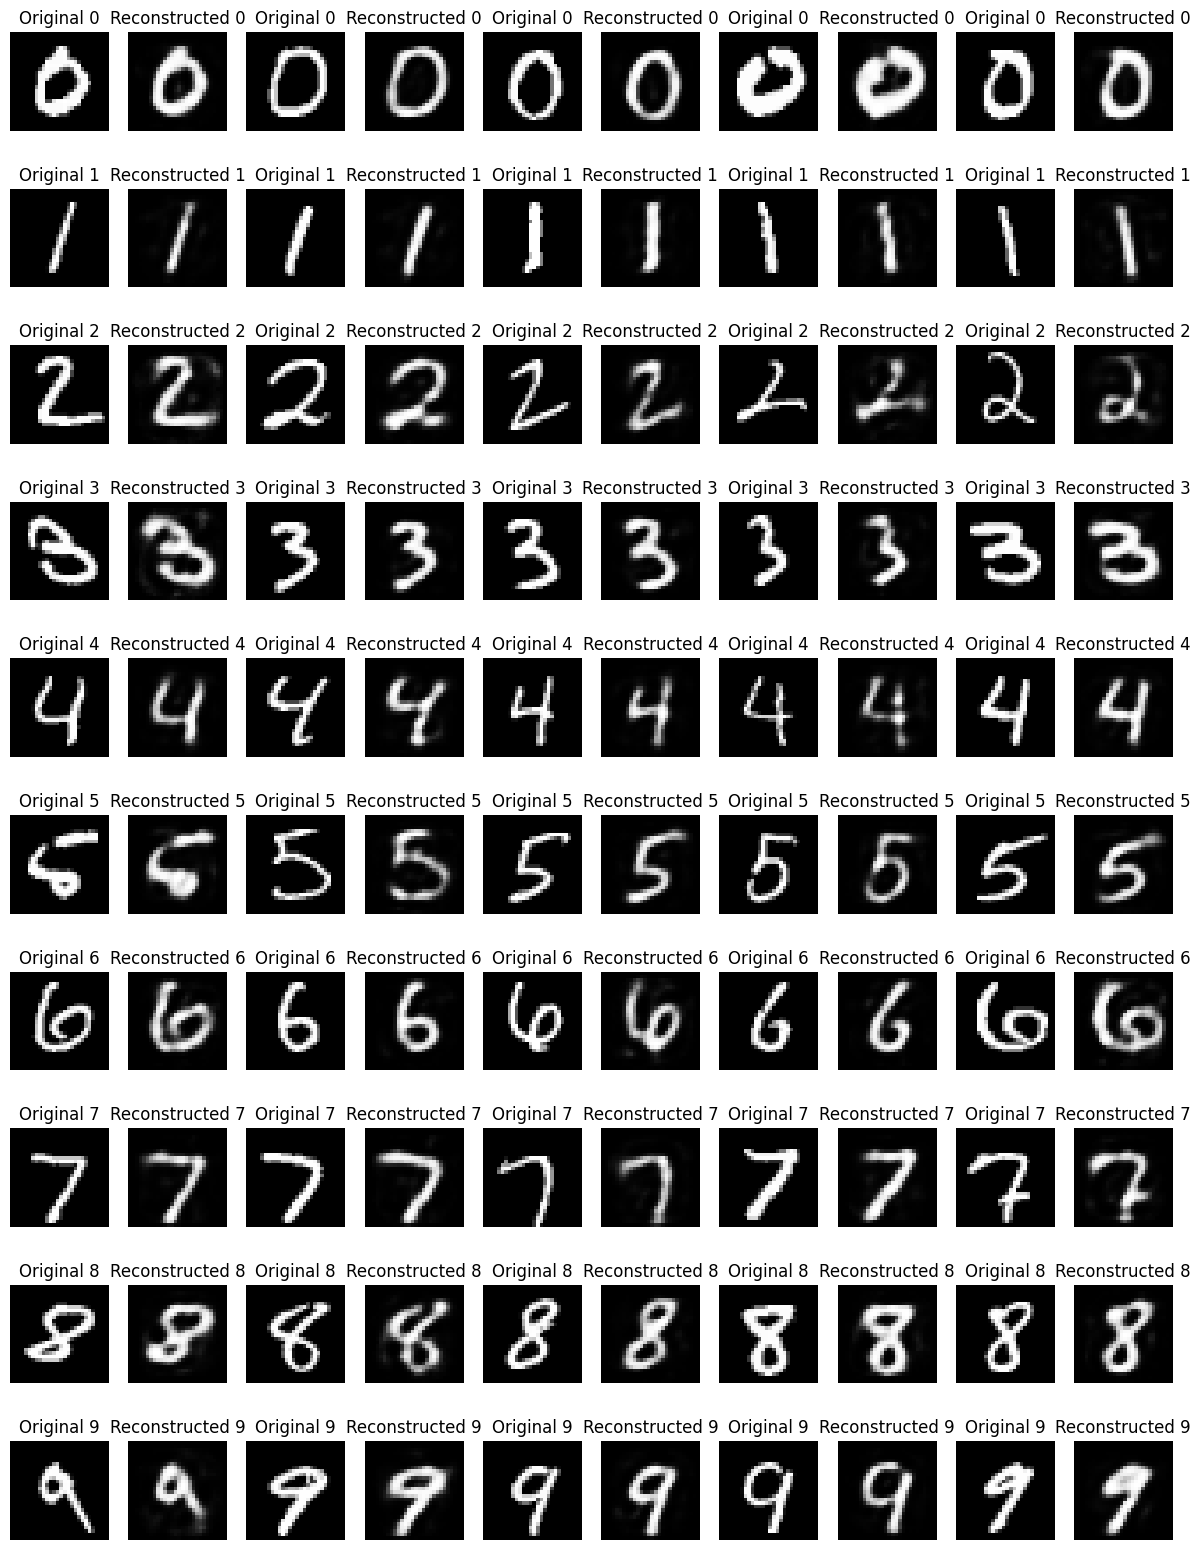

In [14]:
# Select 5 images for each digit
images_per_digit = 5
digit_images = {i: [] for i in range(10)}

with torch.no_grad():
    for data, target in test_loader:
        for i in range(data.size(0)):
            if len(digit_images[target[i].item()]) < images_per_digit:
                digit_images[target[i].item()].append(data[i])

fig, axs = plt.subplots(10, images_per_digit * 2, figsize=(15, 20))

for digit, imgs in digit_images.items():
    for i, img in enumerate(imgs):
        # Original Image
        img_original = img.view(-1)
        axs[digit, 2*i].imshow(img_original.reshape(28, 28), cmap='gray')
        axs[digit, 2*i].set_title(f'Original {digit}')
        axs[digit, 2*i].axis('off')

        # Reconstructed Image
        img_reconstructed = model(img_original).view(28, 28)
        axs[digit, 2*i+1].imshow(img_reconstructed.detach().numpy(), cmap='gray')
        axs[digit, 2*i+1].set_title(f'Reconstructed {digit}')
        axs[digit, 2*i+1].axis('off')

plt.show()